## Load packages

In [64]:
# ! pip install pandas
# ! pip install plotly
# ! pip install pillow
#! pip install C:\Users\prasr\Documents\Northeastern\IDMP\Project\wordcloud-1.8.1-cp39-cp39-win_amd64.whl
# ! pip install matplotlib
# ! pip install nltk

# ! pip install scipy
! pip install better-profanity


In [ ]:
import nltk
nltk.download("popular")

In [65]:
import pandas as pd
import numpy as np
import plotly.express as px
import wordcloud
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude
from better_profanity import profanity

## Load dataset


In [10]:
df = pd.read_csv(r"C:\Users\prasr\Documents\Northeastern\IDMP\Project\sarcasm_detection\data\raw\train-balanced-sarcasm.csv")
df.head()

label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  
1  The blazers and Mavericks (The wests 5 and 6 s...  
2                            They're favored to win.  
3                         deadass don't kill my buzz  
4  Yep can confirm I saw the tool they use for th...

In [24]:
df.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [26]:
df = df.fillna('')
df.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

## columns

In [11]:
df.columns.tolist()

['label',
 'comment',
 'author',
 'subreddit',
 'score',
 'ups',
 'downs',
 'date',
 'created_utc',
 'parent_comment']

In [12]:
# TODO clean date. Date is useless here extract from created_utc

## PRELIM VISUALIZATIONS:

In [72]:
tmp = df.groupby(['subreddit']).size().reset_index(name = "count").sort_values(by = ['count'],ascending=False).head(25)

fig = px.bar(tmp, x='subreddit', y='count',title="Top 25 popular subreddit")
fig.show()

## Wordcloud

In [17]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

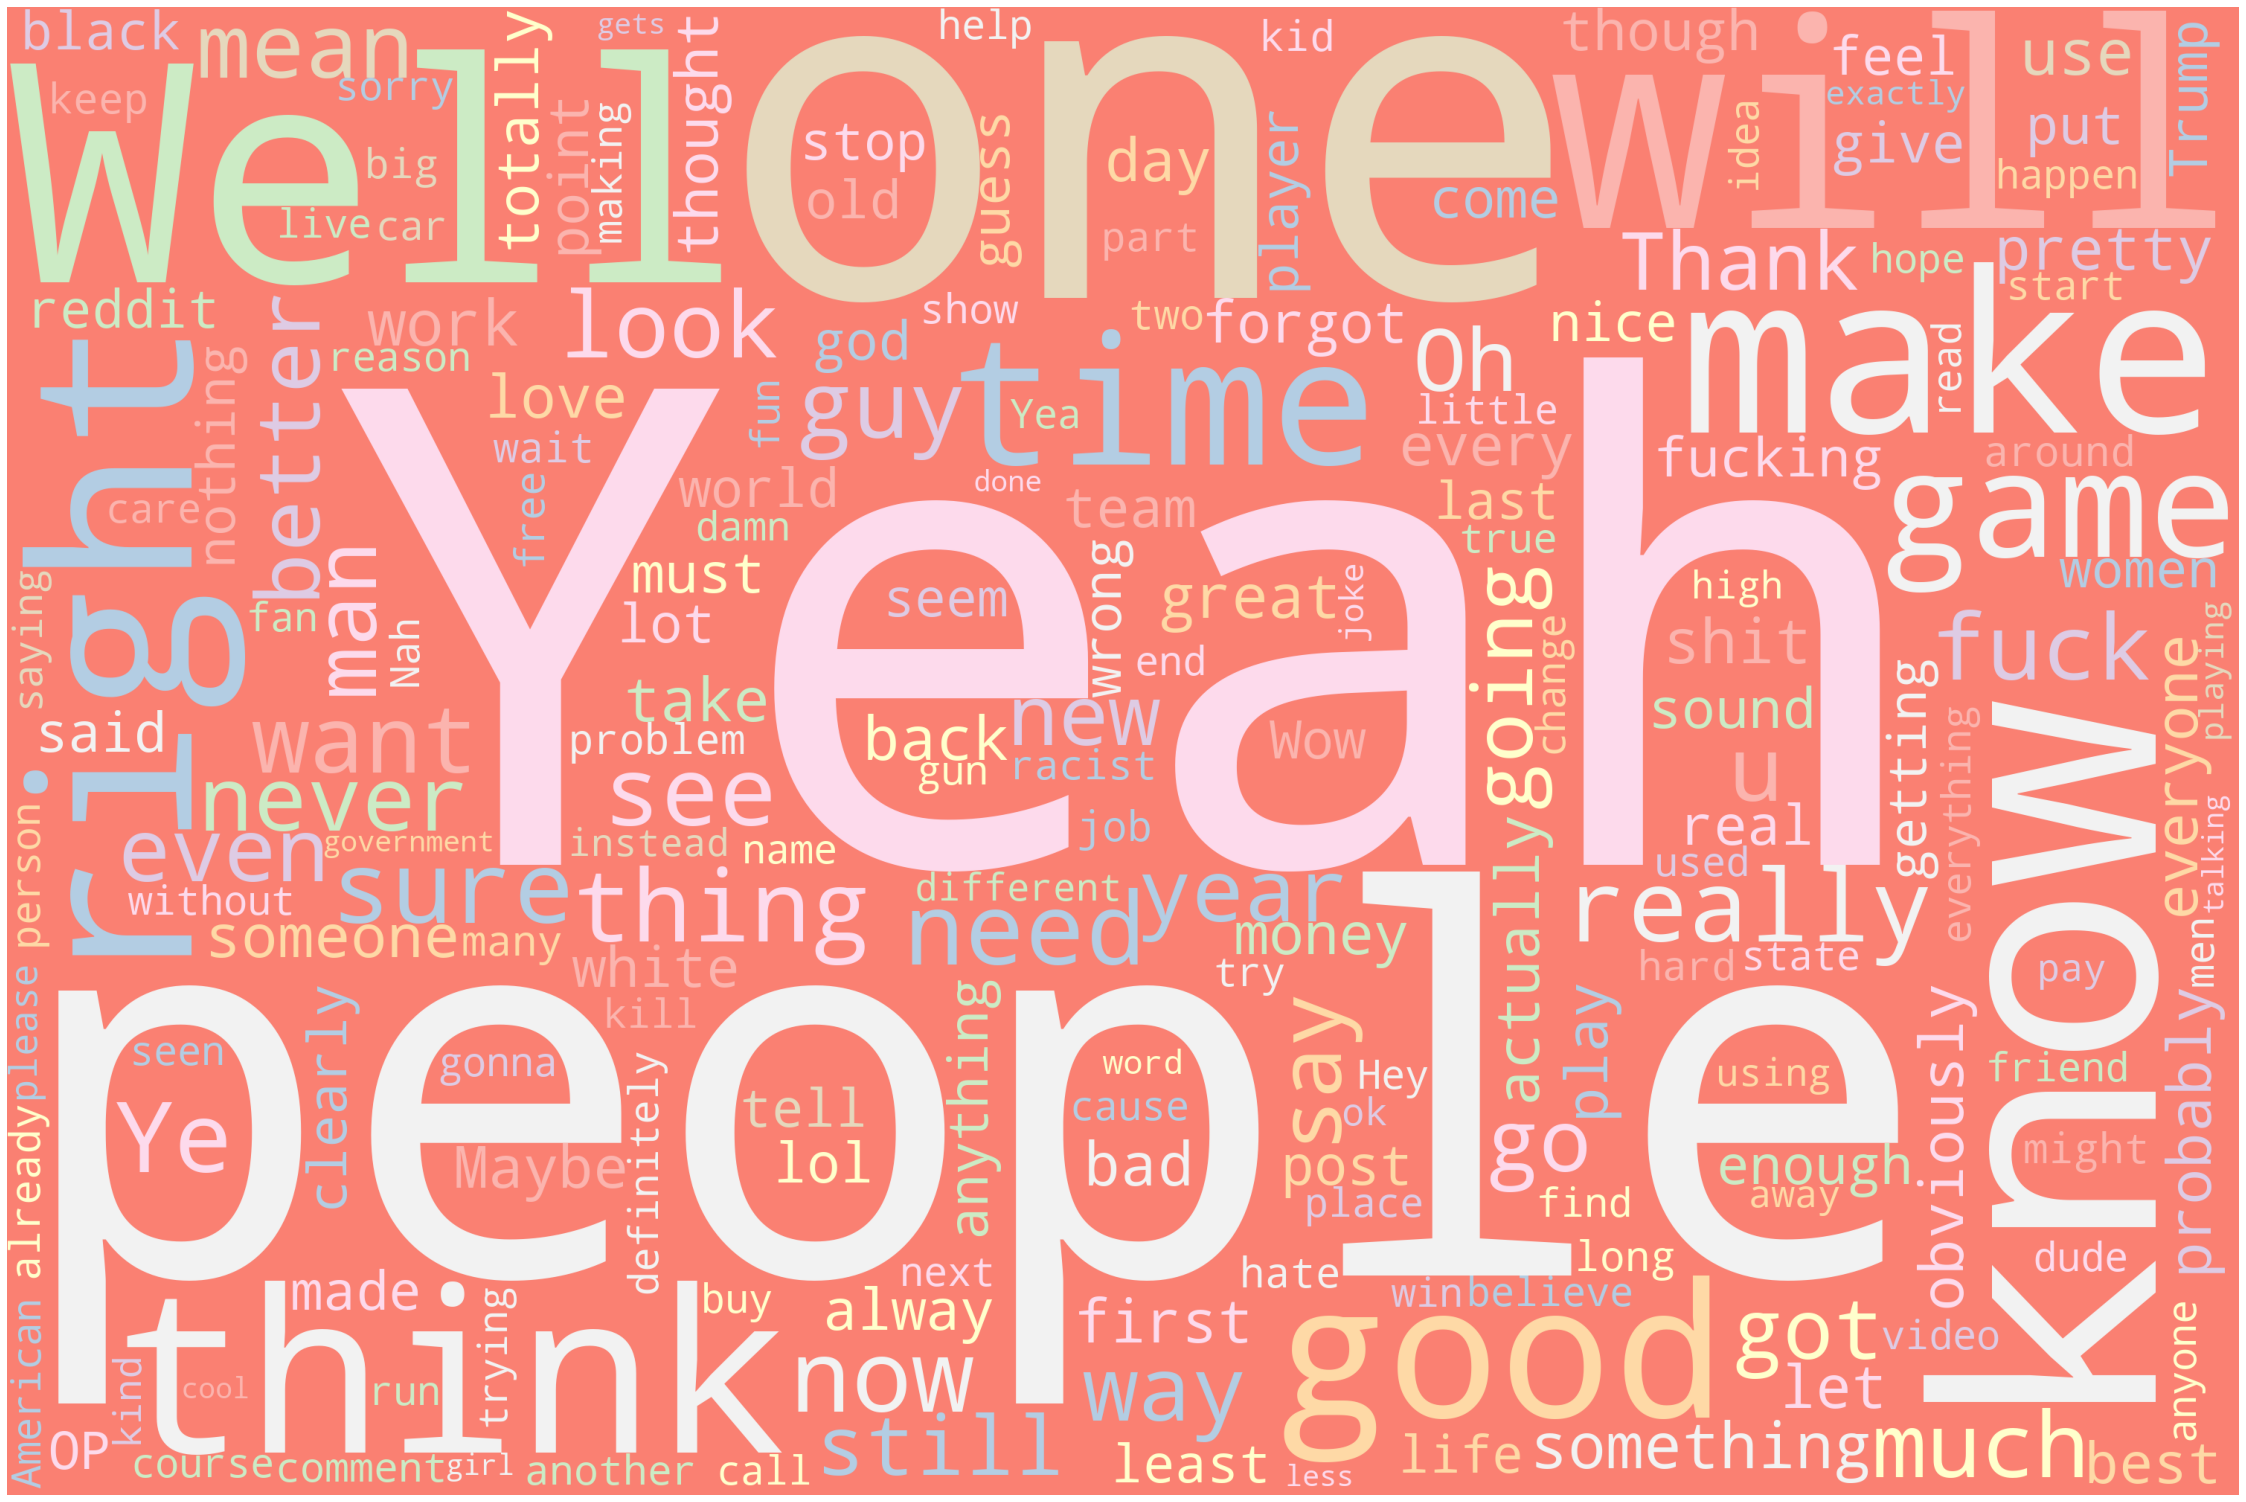

In [29]:
comments_text = ' '.join(df['comment'].tolist())

wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, \
background_color='salmon', colormap='Pastel1', collocations=False,\
stopwords = STOPWORDS).generate(comments_text)
plot_cloud(wordcloud)

In [52]:
mask = np.array(Image.open(r'C:\Users\prasr\Documents\Northeastern\IDMP\Project\sarcasm_detection\references\reddit-logo-16.png'))

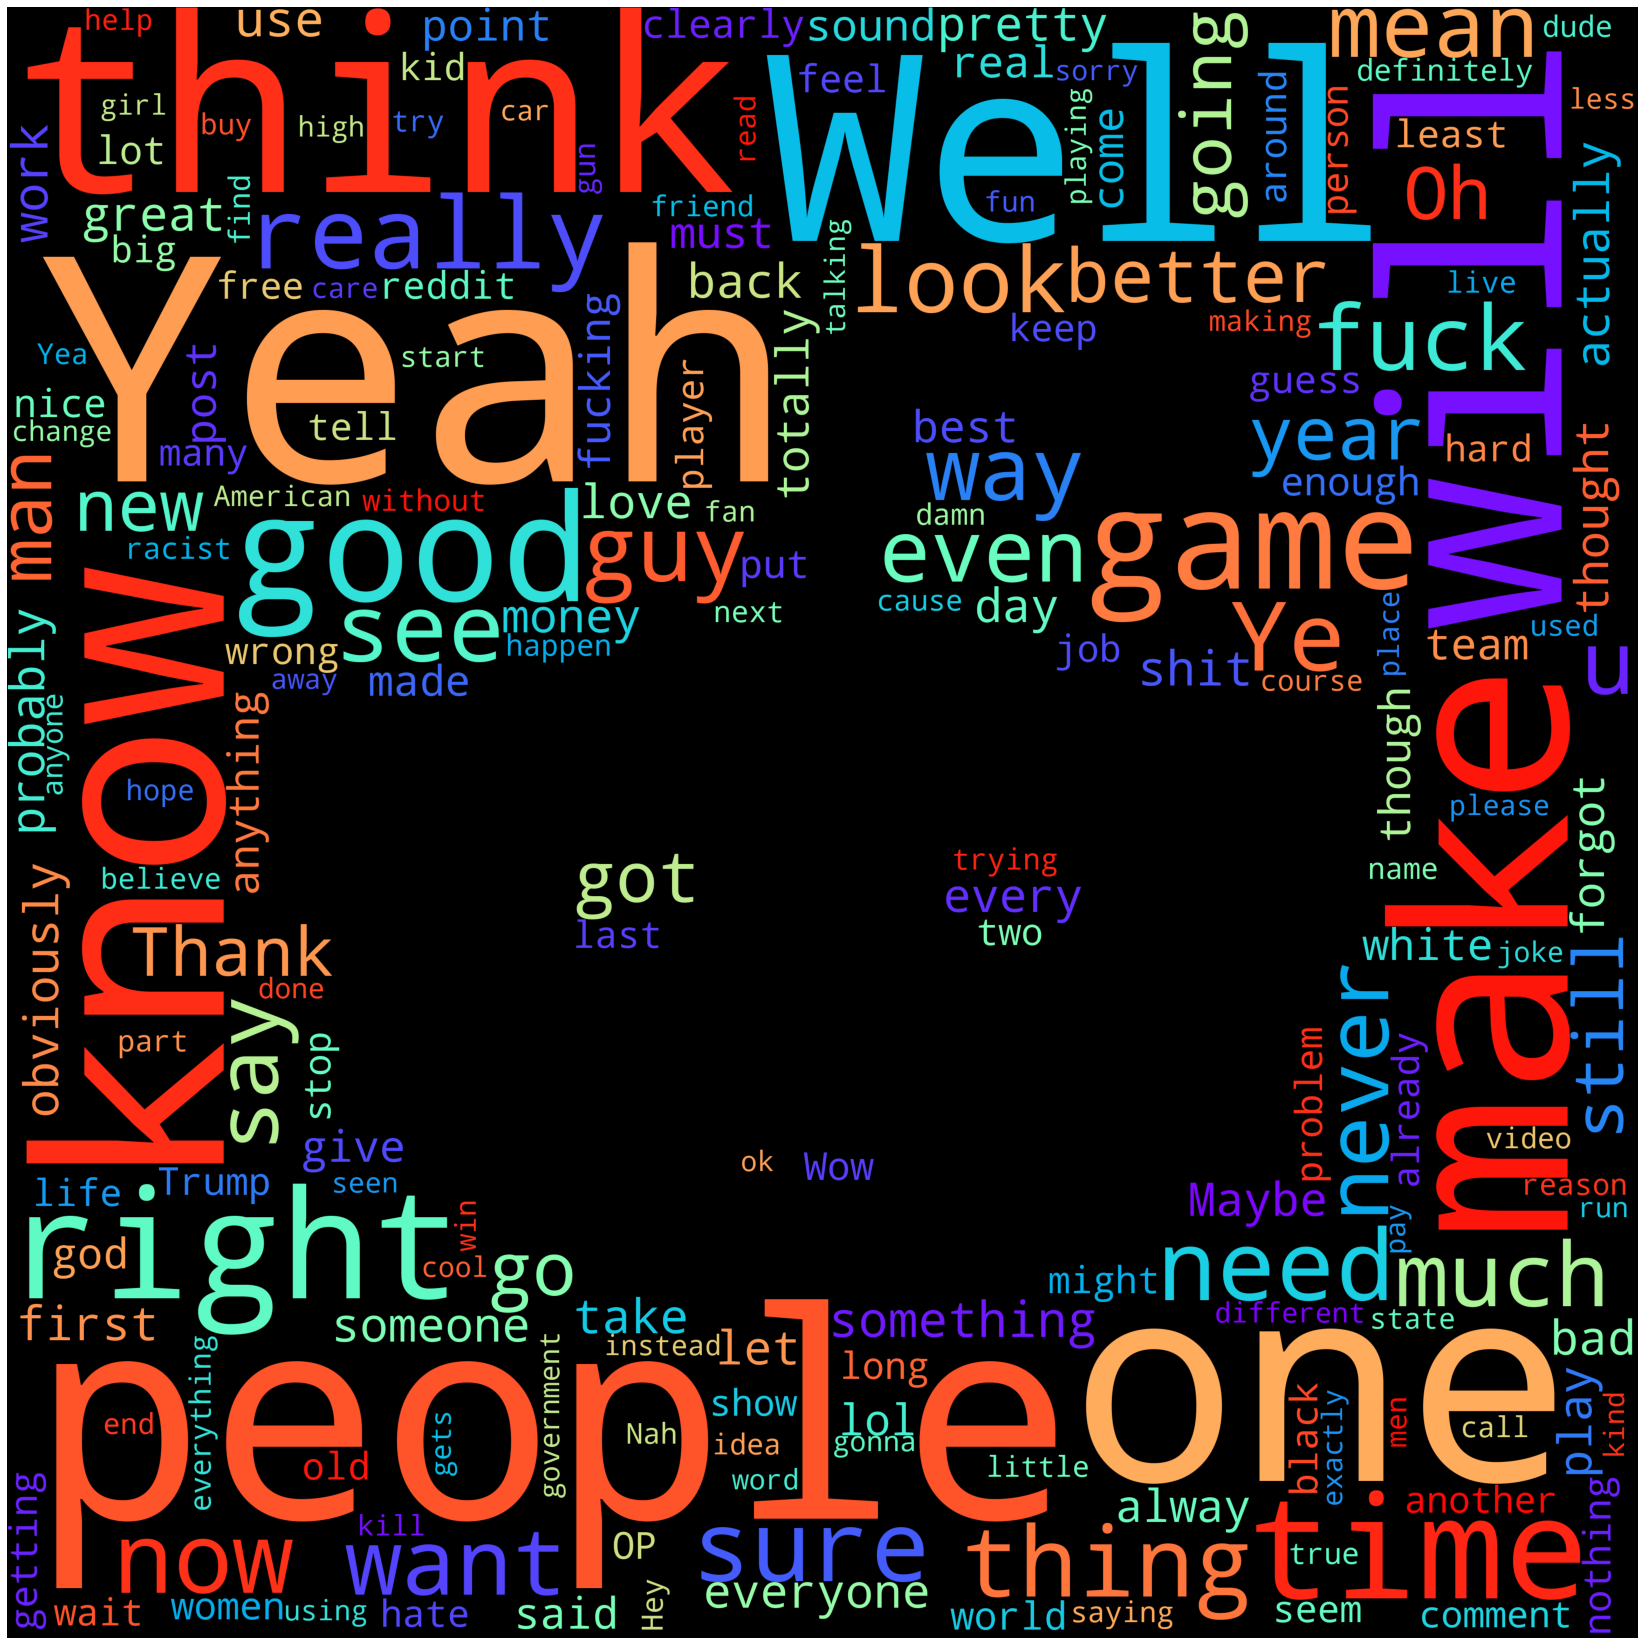

In [57]:
wordcloud = WordCloud( width= 3000, height = 2000,random_state=1, \
background_color='black', colormap='rainbow', collocations=False,\
stopwords = STOPWORDS,mask = mask).generate(comments_text)
plot_cloud(wordcloud)

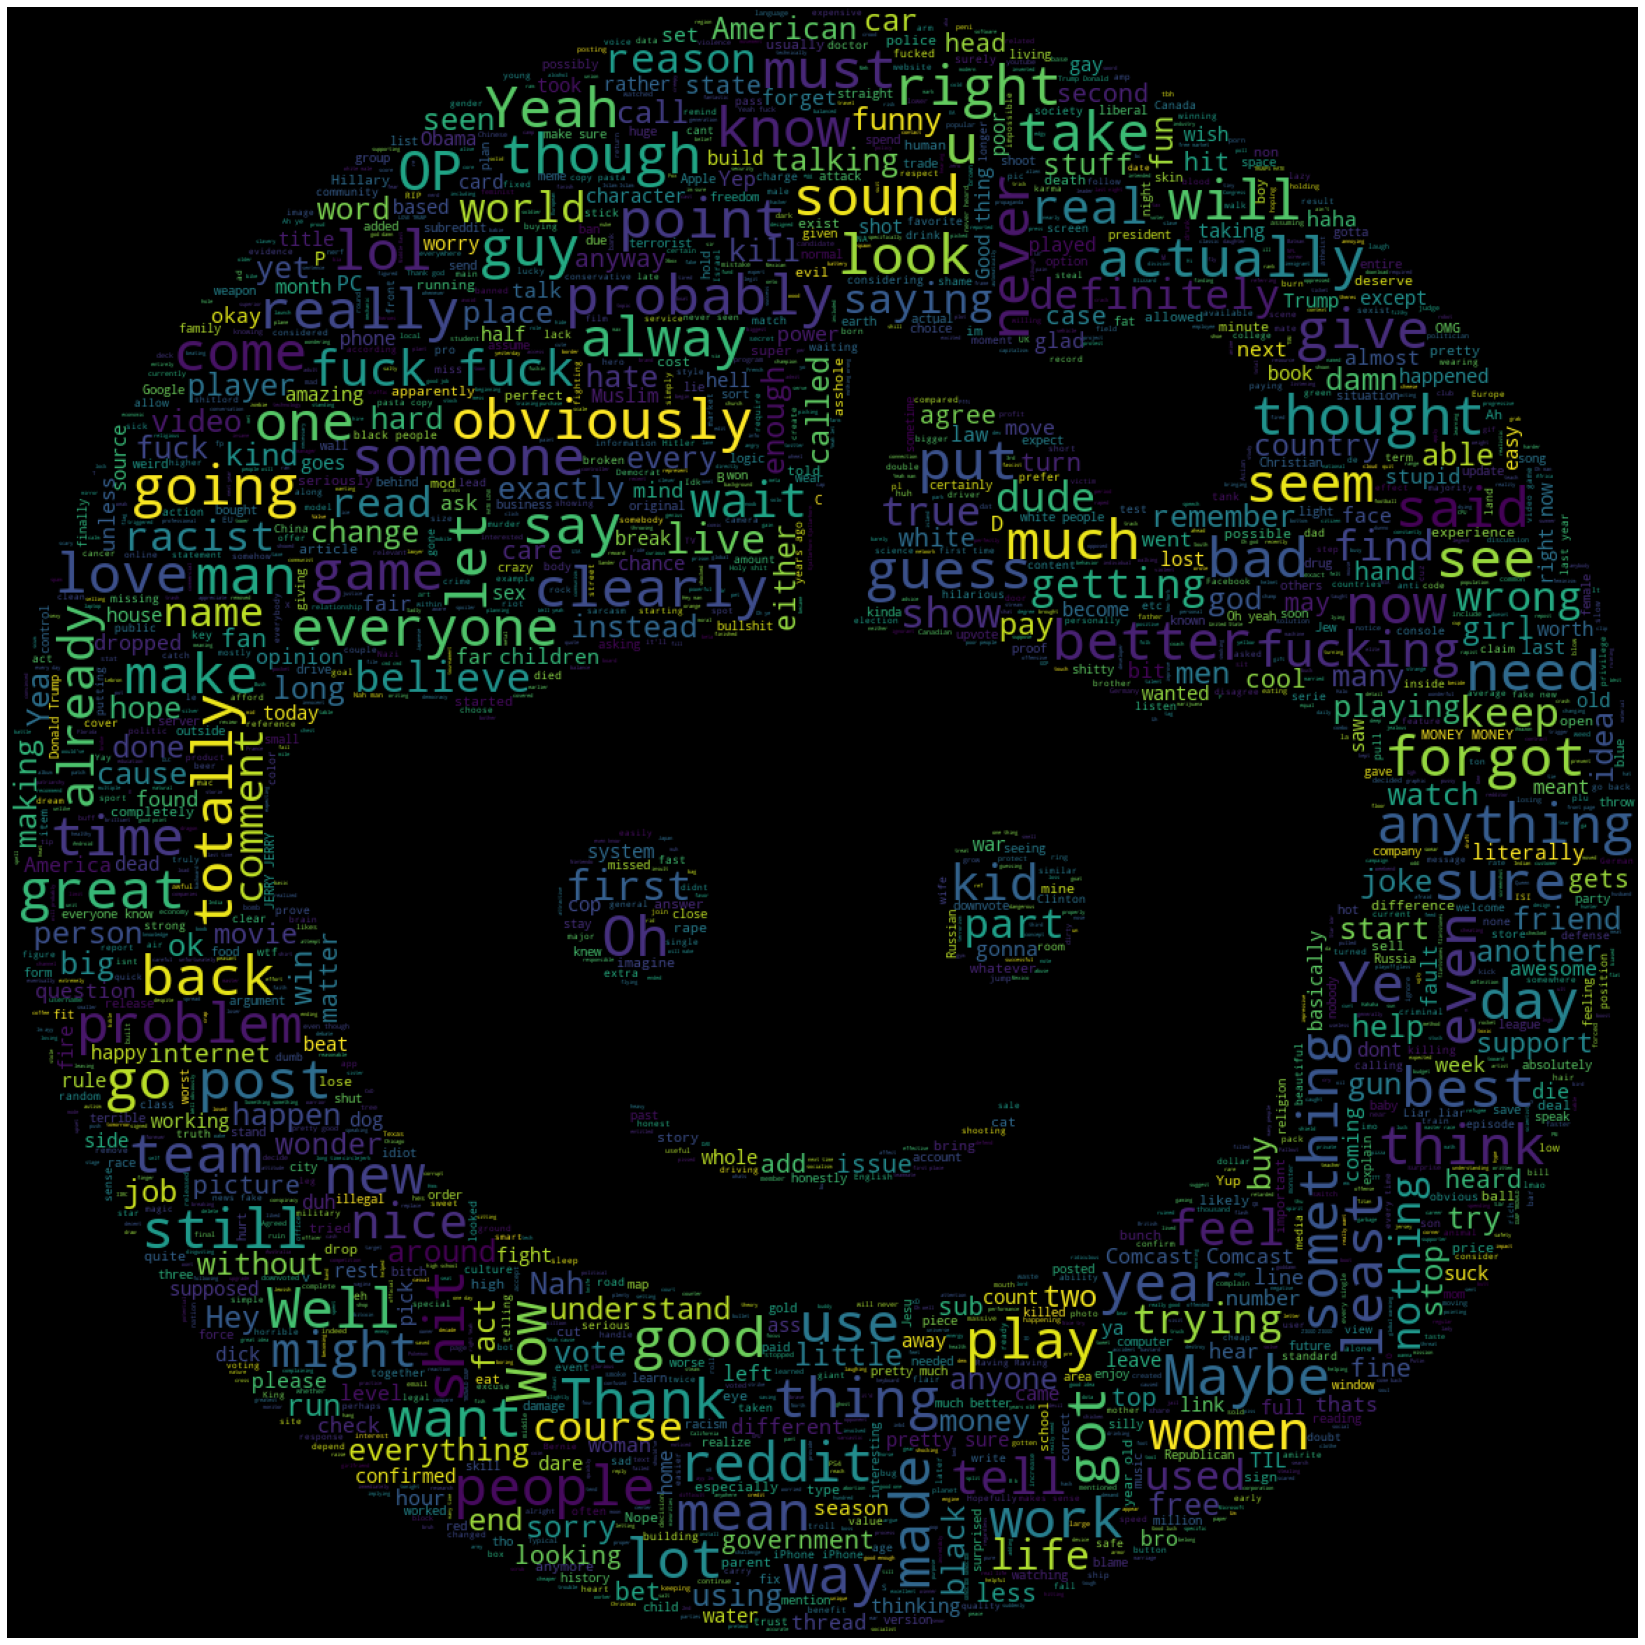

In [62]:
reddit_color = np.array(Image.open(r'C:\Users\prasr\Documents\Northeastern\IDMP\Project\sarcasm_detection\references\reddit-logo-16.png'))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
reddit_color = reddit_color[::3, ::3]

# create mask  white is "masked out"
reddit_mask = reddit_color.copy()
reddit_mask[reddit_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(reddit_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
reddit_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wordcloud = WordCloud(max_words=2000, mask=reddit_mask, max_font_size=40, random_state=42, relative_scaling=0,
 width= 3000, height = 2000,stopwords = STOPWORDS).generate(comments_text)
plot_cloud(wordcloud)

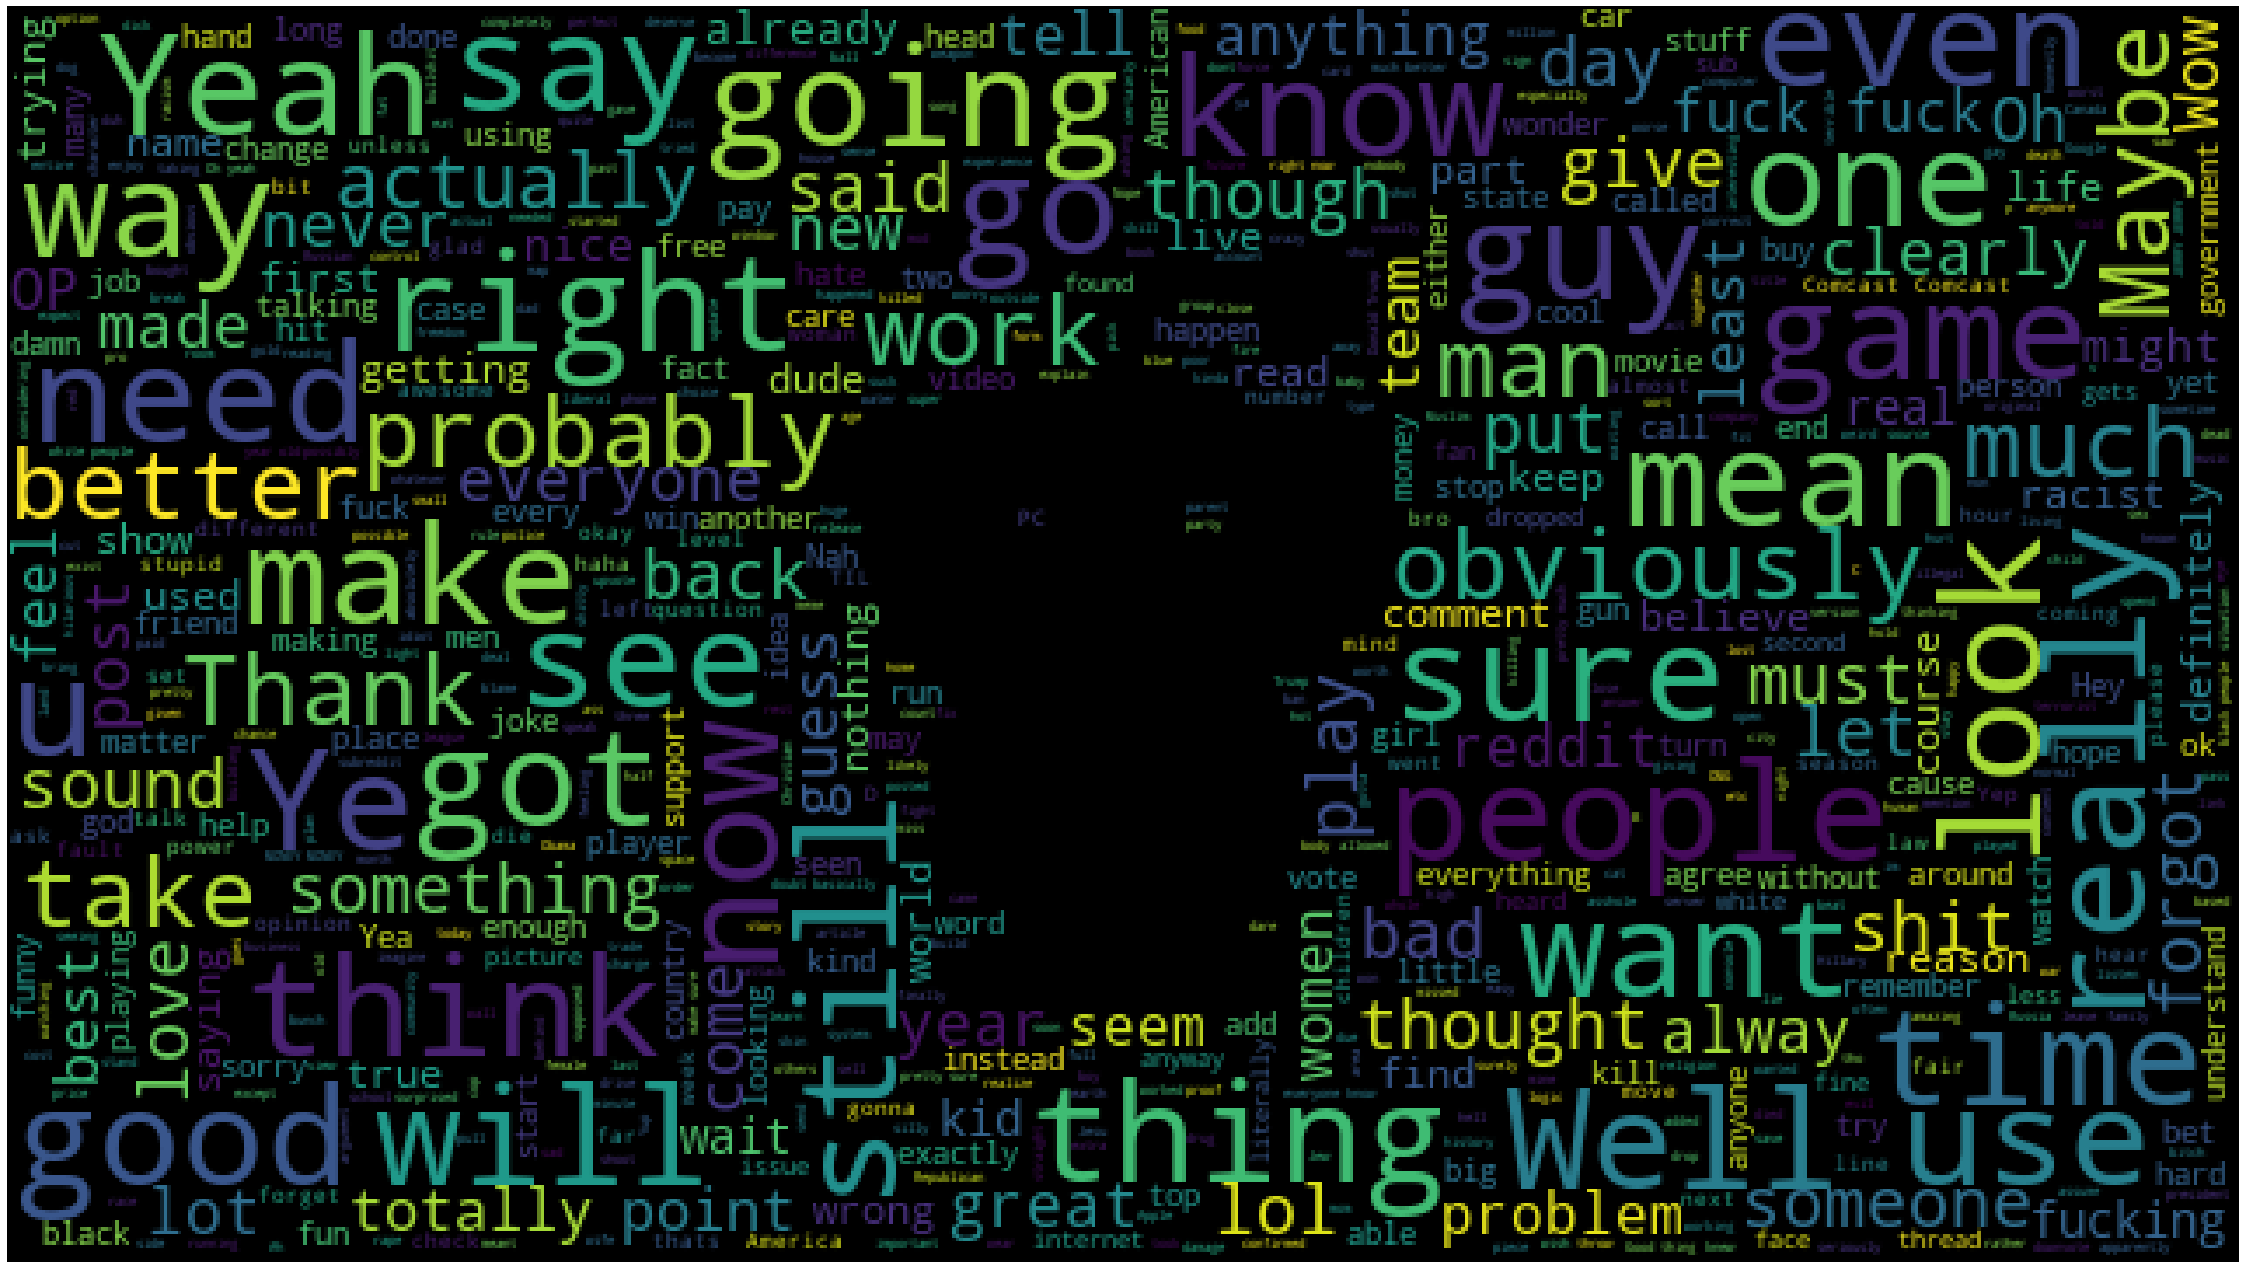

In [63]:
reddit_color = np.array(Image.open(r'C:\Users\prasr\Documents\Northeastern\IDMP\Project\sarcasm_detection\references\reddit-alien.png'))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
reddit_color = reddit_color[::3, ::3]

# create mask  white is "masked out"
reddit_mask = reddit_color.copy()
reddit_mask[reddit_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(reddit_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
reddit_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wordcloud = WordCloud(max_words=2000, mask=reddit_mask, max_font_size=40, random_state=42, relative_scaling=0,
 width= 3000, height = 2000,stopwords = STOPWORDS).generate(comments_text)
plot_cloud(wordcloud)

In [71]:
profanity.load_censor_words()
tmp = df.head()
abusive_comments_text = ' '.join(df[df['comment'].apply(lambda x: profanity.contains_profanity(x))].tolist())


AttributeError: 'DataFrame' object has no attribute 'tolist'

In [70]:
df.shape

(1010826, 10)